In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
class env:
    def __init__(self,q_value):
        self.true_mean = [1.0, 2.0, 3.0]
        self.q_value = q_value
        self.arm_count = [1,1,1] 

    def reward(self,action):
        return np.random.randn() + self.true_mean[action]

    def update_action_values(self,reward,action):
        self.arm_count[action] += 1
        step_size = 1/self.arm_count[action]
        self.q_value[action] += step_size * (reward -  self.q_value[action])

In [46]:
class agent:
    def __init__ (self,N):
        self.arms = 3
        self.N = N # number if experiments do by agent   
        self.visualiza_data = np.empty(self.N)

    def run_experiment(self,env,epsilon=0,c=0):
        for iteration in range(self.N):
            p = np.random.random()

            if epsilon > p :
                action = np.random.choice(self.arms)
            else:
                max_action_values = [i for i in range(self.arms)
                       if env.q_value[i] == np.max(env.q_value)]
                action = np.random.choice(max_action_values)

                reward = env.reward(action)    
                env.update_action_values(reward,action)
                self.visualiza_data[iteration] = reward

            cumulative_average = np.cumsum(self.visualiza_data)/(np.arange(self.N) + 1 )
        return cumulative_average

https://medium.com/@isurualagiyawanna/step-up-into-artificial-intelligence-and-reinforcement-learning-solving-the-multi-armed-bandit-d82b8b28544a

## Epsilon Greedy

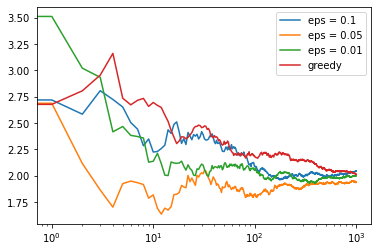

In [49]:
N = 1000

q_value = [1.0,2.0,1.5]
exp_1 = agent(N).run_experiment( env(q_value), 0.1)
exp_2 = agent(N).run_experiment( env(q_value), 0.05)
exp_3 = agent(N).run_experiment( env(q_value), 0.01)
exp_4 = agent(N).run_experiment( env(q_value), 0)
plt.plot(exp_1 , label = "eps = 0.1")
plt.plot(exp_2 , label = "eps = 0.05")
plt.plot(exp_3 , label = "eps = 0.01")
plt.plot(exp_4 , label = "greedy")
plt.legend()
plt.xscale('log')
plt.show()